# Netflix Stock Price Prediction Using LSTM 

#### - Aritifical recurrent neural network called long short term memory (LSTM). 
#### - Predicting the closing stock price of a corporation (Netflix) using the past 60 day price.
#### - General: LSTM- Used in the field of deep learning which has feedback connections, can process sequences. 

## Installing Packages 

In [1]:
import requests

import pip
pip.main(['install', 'pandas_datareader'])

import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# DataReader Stock Quote (c'Yahoo)

In [5]:
# Obtain the stock quote 
df = web.DataReader('NFLX', data_source= 'yahoo', start= '2012-01-01', end= '2022-01-25')

# Display the dataframe that is needed
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,10.388571,10.018571,10.040000,10.320000,29213800.0,10.320000
2012-01-04,11.567143,10.258571,10.335714,11.492857,100489900.0,11.492857
2012-01-05,11.694286,11.040000,11.345714,11.328571,86552900.0,11.328571
2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714
...,...,...,...,...,...,...
2022-01-19,523.210022,510.510010,515.000000,515.859985,4353500.0,515.859985
2022-01-20,526.640015,506.929993,517.750000,508.250000,12659000.0,508.250000
2022-01-21,409.149994,379.989990,400.429993,397.500000,58824800.0,397.500000


In [6]:
# rows and columns of the netflix stock from 2012 to 2022
# factors with the highest price, lowest price, open, close, volume traded and adj close. 

df.shape

(2533, 6)

# Closing Price Stock Visual

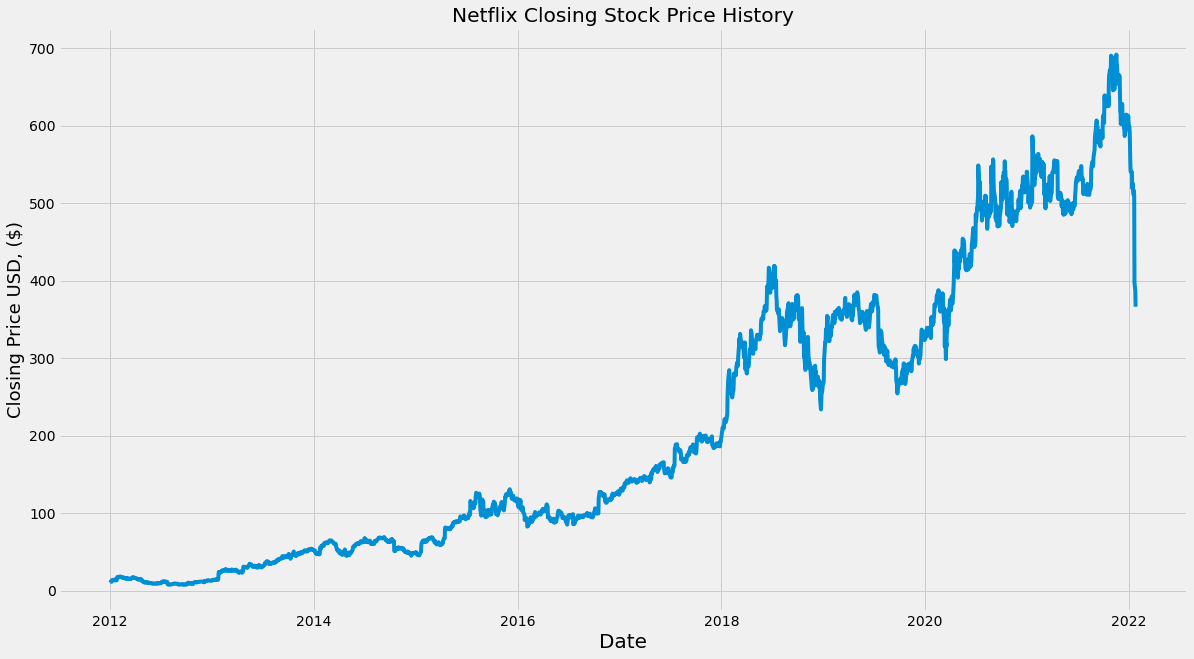

In [7]:
# visualise the dataset and the closing price history through this period
# create a plot using the relevant variables

plt.figure(figsize=(18,10))
plt.title('Netflix Closing Stock Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize= 20)
plt.ylabel('Closing Price USD, ($)', fontsize= 18)
plt.show()

In [8]:
# Create a new dataframe with a close column 
data= df.filter(['Close'])

# Convert the dataframe into a numpy array
dataset = data.values

# Get the rows so the model can be trained 

training_data_len = math.ceil(len(dataset) * 0.8) # training the data on about 80% and round the numbers up
training_data_len #print the length of the training dataset. 

2027

In [9]:
# Scale the data as applying pre-processing is beneficial, helping the model before using neural network

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00385127],
       [0.00556596],
       [0.00532578],
       ...,
       [0.56990035],
       [0.55476886],
       [0.52446206]])

In [10]:
# will be using the dataset which is used for ***training***

train_data = scaled_data[0:training_data_len, :]


# a_train & # b_train *** split training dataset into a and b.

a_train = []
b_train = []

for i in range(60, len(train_data)):
    a_train.append(train_data[i-60:i, 0])
    b_train.append(train_data[i, 0])
    if i<= 61:
        print(a_train)
        print(b_train)
        print()

[array([0.00385127, 0.00556596, 0.00532578, 0.00678567, 0.00926895,
       0.00877814, 0.00800956, 0.00800956, 0.0084753 , 0.00854631,
       0.00934414, 0.0103717 , 0.00969919, 0.00838758, 0.00811816,
       0.00861315, 0.01299282, 0.0146177 , 0.01496022, 0.01386792,
       0.01444644, 0.01466156, 0.01516908, 0.01575805, 0.01547192,
       0.01466156, 0.014837  , 0.01464694, 0.01347109, 0.01446733,
       0.01425639, 0.01422506, 0.01421253, 0.01328313, 0.01223885,
       0.01236208, 0.01208639, 0.01161438, 0.012431  , 0.01189007,
       0.01231195, 0.01280276, 0.01190678, 0.01113819, 0.01073302,
       0.01133452, 0.0115559 , 0.01094396, 0.01097529, 0.01074555,
       0.01177311, 0.01172925, 0.01264194, 0.01278605, 0.01384703,
       0.0135609 , 0.01386583, 0.01424177, 0.01396608, 0.01357761])]
[0.012792318847363655]

[array([0.00385127, 0.00556596, 0.00532578, 0.00678567, 0.00926895,
       0.00877814, 0.00800956, 0.00800956, 0.0084753 , 0.00854631,
       0.00934414, 0.0103717 , 0.0

In [11]:
# converting training data sets into numpy arrays 

a_train, b_train = np.array(a_train), np.array(b_train)

In [13]:
#rehspaing the data as the LTSM expects to be in 3 dimensional shape. Currently at 2 dimensional
a_train = np.reshape(a_train, (a_train.shape[0], a_train.shape[1], 1))
a_train.shape # two dimensional using rows x columns

(1967, 60, 1)

# Building the LSTM Model

In [14]:
## Building the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (a_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

2022-01-27 18:49:17.892402: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Compiling the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
## Train the model
model.fit(a_train, b_train, batch_size=1, epochs=1)

1967/1967 [==============================] - 33s 15ms/step - loss: 7.4458e-04


In [17]:
## Forming the new testing dataset 
## Creating a new array 

test_data = scaled_data[training_data_len - 60: , :]

# creating datasets a_test and b_test

a_test = []
b_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    a_test.append(test_data[i-60:i, 0])

In [18]:
# Convert testing dataset in a numpy array to use in the LSTM Model 

a_test = np.array(a_test)

In [19]:
# Reshape the data as data is 2 dimemsional but it needs to be 3 dimensional

a_test = np.reshape(a_test, (a_test.shape[0], a_test.shape[1], 1))

In [21]:
## Obtain the predicted prices from the models
# want the predictions to contain the same values as b_test dataset

predictions = model.predict(a_test)
predictions = scaler.inverse_transform(predictions) 

In [22]:
# obtain the root mean to check for model accuracy RMSE

rmse = np.sqrt(np.mean(predictions - b_test)**2)
rmse

26.43643984587296

/var/folders/33/w6rx_h4j3316nd3522bny_n00000gn/T/ipykernel_32792/3147602947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


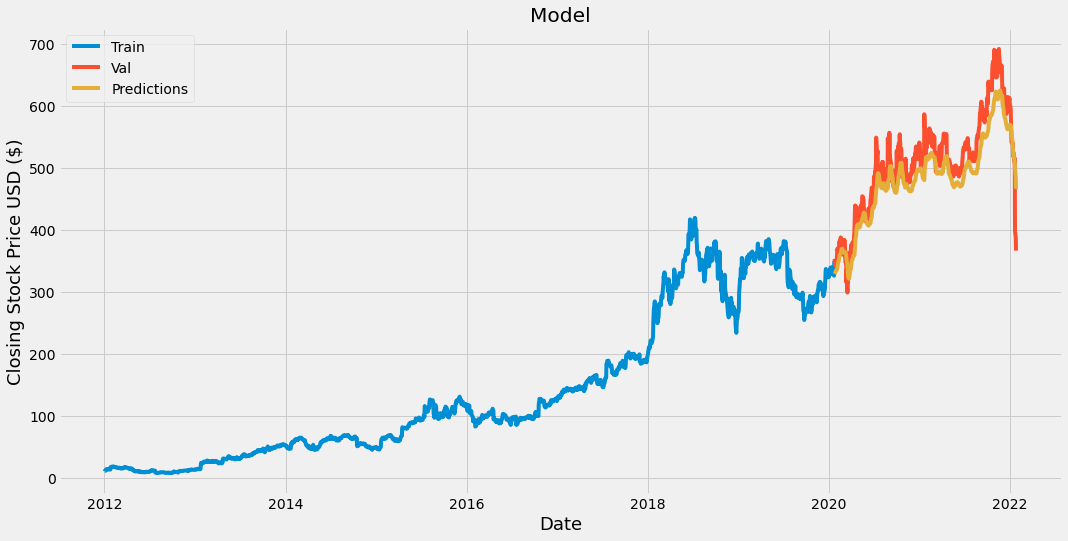

In [24]:
# plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualise the data through a plot

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Stock Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [25]:
# comment: predictions and actual values are pretty close 

In [27]:
# get the actual closing price and predicted closing price in a table
valid

,Close,Predictions
Date,,
2020-01-24,353.160004,328.897766
2020-01-27,342.880005,330.941284
2020-01-28,348.519989,332.200409
2020-01-29,343.160004,333.598206
2020-01-30,347.739990,334.330261
...,...,...
2022-01-19,515.859985,509.502686
2022-01-20,508.250000,504.817566
2022-01-21,397.500000,500.305054


In [28]:
netflix_quote = web.DataReader('NFLX', data_source='yahoo', start= '2012-01-01', end= '2022-01-25')
# new dataframe for last 60 day closing price
new_df = netflix_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
A_test = []
A_test.append(last_60_days_scaled)
A_test = np.array(A_test)
A_test = np.reshape(A_test, (A_test.shape[0], A_test.shape[1], 1))
pred_price = model.predict(A_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[445.55594]]


In [29]:
# the model predicts that the closing price of netflix stock on 26th january 2022 will be 445.66

In [30]:
# actual closing price of netflix stock on 26th january 2022 was:
netflix_quote1 = web.DataReader('NFLX', data_source='yahoo', start= '2022-01-26', end= '2022-01-26')
print(netflix_quote1['Close'])

Date
2022-01-26    359.700012
Name: Close, dtype: float64


#### More Predictions:

In [36]:
netflix_quote4 = web.DataReader('NFLX', data_source='yahoo', start= '2012-01-01', end= '2022-01-26')
# new dataframe for last 60 day closing price
new_df = netflix_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
A_test = []
A_test.append(last_60_days_scaled)
A_test = np.array(A_test)
A_test = np.reshape(A_test, (A_test.shape[0], A_test.shape[1], 1))
pred_price = model.predict(A_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[411.83572]]


In [33]:
# netflix_quote_4 predicts that the closing price of netflix stock on 27th january 2022 will be $411.83

In [37]:
# actual closing price of netflix stock on 27th january 2022 was:
netflix_quote5 = web.DataReader('NFLX', data_source='yahoo', start= '2022-01-27', end= '2022-01-27')
print(netflix_quote1['Close'])

Date
2022-01-26    359.700012
Name: Close, dtype: float64


# Comments:

#### This model was used to predict the future closing price of netflix stock (NFLX) and it was understood that the prediction made by the trained model was off by a distance for the 26th January 2022. The model predicted that the closing price would be 445.55 however the actual price recorded for the stock by Yahoo was 359.70. A difference of 85.85.   